# Центральная предельная теорема своими руками

## Задание:

В этом задании вам предстоит проверить работу центральной предельной теоремы, а также поработать с генерацией случайных чисел и построением графиков в Питоне. 

Выберите ваше любимое непрерывное распределение (чем меньше оно будет похоже на нормальное, тем интереснее; попробуйте выбрать какое-нибудь распределение из тех, что мы не обсуждали в курсе). Сгенерируйте из него выборку объёма 1000, постройте гистограмму выборки и нарисуйте поверх неё теоретическую плотность распределения вашей случайной величины (чтобы величины были в одном масштабе, не забудьте выставить у гистограммы значение параметра normed=True).

Ваша задача — оценить распределение выборочного среднего вашей случайной величины при разных объёмах выборок. Для этого при трёх и более значениях n (например, 5, 10, 50) сгенерируйте 1000 выборок объёма n и постройте гистограммы распределений их выборочных средних. Используя информацию о среднем и дисперсии исходного распределения (её можно без труда найти в википедии), посчитайте значения параметров нормальных распределений, которыми, согласно центральной предельной теореме, приближается распределение выборочных средних. Обратите внимание: для подсчёта значений этих параметров нужно использовать именно теоретические среднее и дисперсию вашей случайной величины, а не их выборочные оценки. Поверх каждой гистограммы нарисуйте плотность соответствующего нормального распределения (будьте внимательны с параметрами функции, она принимает на вход не дисперсию, а стандартное отклонение).

Опишите разницу между полученными распределениями при различных значениях n. Как меняется точность аппроксимации распределения выборочных средних нормальным с ростом n?

Решение должно представлять собой IPython-ноутбук, содержащий:

код, генерирующий выборки и графики;

краткие описания каждого блока кода, объясняющие, что он делает;

необходимые графики (убедитесь, что на них подписаны оси);

выкладки с вычислениями параметров нормальных распределений, аппроксимирующих выборочные средние при различных n;

выводы по результатам выполнения задания.

## Выбор распределения и генерация выборки

In [2]:
#импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import math

Было выбрано Бета-распредление - оно моделирует вероятность, его область определения ограничена 0 и 1.
https://ru.wikipedia.org/wiki/%D0%91%D0%B5%D1%82%D0%B0-%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5

Оно определяется двумя значениями: количеством успешных исходов и количеством неудач

Заинтересовало, тк в зависимости от вводных график плотности может принимать абсолютно разную форму: форму как у нормального распределения, прямую линию, U-образную форму

In [146]:
# выбор вводных таким образом что бы график плоности не был похож на нормальное распределение
a = 2
b = 1

beta_rv = sts.beta(a,b) 
sample = beta_rv.rvs(1000) # генерация случайной выборки 1000 значений
sample[:5] # вывод первых 5 чисел что бы убедиться что формируется массив

array([0.63988581, 0.36893533, 0.88171118, 0.71846459, 0.57044423])

Text(0.5, 0, '$x$')

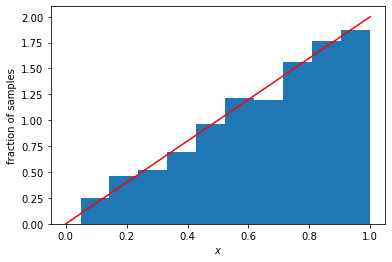

In [147]:
# построение гистаграммы, количество интервалов оставлено по умолчанию
plt.hist(sample, density=True)

# массив точек для построения графика плотности распределения - от 0 до 1, тк область определения распределения ограничена этими параметрами
x = np.linspace(0,1,1000)
# вычисление значения плотности распределения от выборки
pdf = beta_rv.pdf(x) 

# построение теоретической функции распределения
plt.plot(x, pdf, color='red')

# наименование осей
plt.ylabel('fraction of samples')
plt.xlabel('$x$')

## Оценка распределения выборочного среднего

In [156]:
# формулы мат ожидания и дисперсии для Beta-распределения, где a и b - количество успешных и неудачных исходов
E = a / (a + b)
D = a * b / ((a + b)**2) * (a + b +1)

In [197]:
def get_1000sample(n):
    samples = [beta_rv.rvs(n).mean() for i in range(1000)] # определение средних по выборкам
    E, D = sts.norm.fit(samples)
    # построение гистограммы
    plt.hist(samples, density=True, bins = 25)
    # построение графика плотности для средних значений
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 1000)
    p = sts.norm.pdf(x, E, D)
    plt.plot(x, p, 'red', label="Среднее =%s" % (E))
    plt.legend(loc='center')
    plt.show()

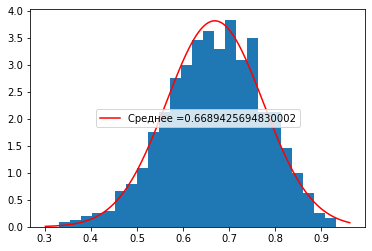

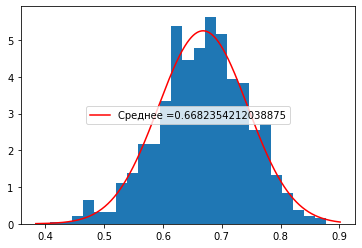

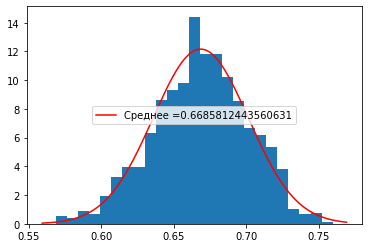

In [198]:
for n in [5, 10, 50]:
  get_1000sample(n)

## Вывод

Данная работа подтверждает действие теоремы выборки уже с первой гистограммы (при правильно подобранном количестве рассматриваемых интервалов) - значения средних близки к теоритическим расчетам.
Так же с увеличением n в выборке мы видим что дисперсия уменьшается, что так же подтверждает теорему.